In [13]:
import numpy as np

## **Lower-traingular Solve**

In [14]:
def lower_triangular_solve(A, b):
    """
    Solve the system  A x = b  where A is assumed to be lower triangular,
    i.e. A(i,j) = 0 for j > i, and the diagonal is assumed to be nonzero,
    i.e. A(i,i) != 0.
    
    The code checks that A is lower triangular and converts A and b to
    double precision before computing.

    ARGUMENTS:  A   lower triangular n x n array
                b   right hand side column n-vector

    RETURNS:    x   column n-vector solution
    """
    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    #check that the sizes of A and b match and A is square
    if A.shape[0] != A.shape[1] or A.shape[0] != len(b):
        raise ValueError("invalid input shapes")
    
    # check that A is lower triangular
    for i in range(A.shape[0]):
        #check that A does not have any zero diagonal elements
        if np.isclose(A[i,i], 0.0):
            raise ValueError("A contains zero diagonal element(s)")
        for j in range(i+1, A.shape[0]):
            if not np.isclose(A[i,j], 0.0):
                raise ValueError("A is not lower triangular")
    #initilaise result array
    x = np.empty_like(b)    # returns uninitialised array with same dimensions as the passed argumen
    #perform forward substitution
    x[0] = b[0] / A[0,0]
    for i in range(1,A.shape[0]):
        x[i] = b[i] /A[i,i]
        for j in range(i):
            x[i] = x[i] - x[j] * A[i,j] / A[i,i]
    return x

## **Upper-triangular Solve**

In [15]:
def upper_triangular_solve(A, b):
    """
    Solve the system  A x = b  where A is assumed to be upper triangular,
    i.e. A(i,j) = 0 for j < i, and the diagonal is assumed to be nonzero,
    i.e. A(i,i) != 0.
    
    The code checks that A is upper triangular and converts A and b to
    double precision before computing.

    ARGUMENTS:  A   upper triangular n x n array
                b   right hand side column n-vector

    RETURNS:    x   column n-vector solution
    """
    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    #check that the sizes of A and b match and A is square
    if A.shape[0] != A.shape[1] or A.shape[0] != len(b):
        raise ValueError("invalid input shapes")
    
    #check that A is upper triangular
    for i in range(A.shape[0]):
        #check there are no zero diagonal entries
        if np.isclose(A[i,i], 0.0):
            raise ValueError("zero diagonal entry found")
        for j in range(0, i):
            if not np.isclose(A[i,j], 0.0):
                raise ValueError("not upper triangular")
    
    n = A.shape[0]
    #initialise output array
    x = np.empty_like(b)
    
    #perform backward substitution
    x[n-1] = b[n-1] / A[n-1,n-1]
    for i in range(2, n+1):
        x[n-i] = b[n-i] / A[n-i,n-i]
        for j in range(n-i+1, n):
            x[n-i] = x[n-i] - A[n-i,j] * x[j] / A[n-i,n-i]
    return x

## **Gaussian Elimination**

In [16]:
def gaussian_elimination(A, b, verbose=False):
    """
    Reduce the system  A x = b  to upper triangular form, assuming that
    the diagonal is nonzero, i.e. A(i,i) != 0.
    
    Before computing A and b are converted to double precision.

    ARGUMENTS:  A   n x n matrix
                b   right hand side column n-vector

                verbose  (optional) if true print elimination steps

    RETURNS:    A   upper triangular n x n matrix
                b   modified column n-vector
    """
    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    #check that A is square and the lengths  b = A[0]
    if A.shape[0] != A.shape[1] or A.shape[0] != len(b):
        raise ValueError("Invalid input shapes")
    
    #perform forward elimination
    for i in range(A.shape[0]):
        #check for zero on the diagonal
        if np.isclose(A[i,i], 0.0):
            raise ValueError("zero diagonal entry found")
        # row j = row j - row i * A[j,i] / A[i,i]
        for j in range(i+1, A.shape[0]):
            factor = A[j,i] / A[i,i]
            for k in range(A.shape[0]):
                A[j,k] = A[j,k] - A[i,k] * factor
            b[j] = b[j] - b[i] * factor
    #return A, b
    return upper_triangular_solve(A,b)

## **Gaussian Elimination with Pivoting**

In [17]:
def Gaussian_elimination_pivoting(A, b, verbose=False):
    # To ensure that arrays are stored in double precision.
    A = A.astype(np.float64)
    b = b.astype(np.float64)
     
    # size of solution vector / the square matrix A
    n=len(b) # or   n, n = A.shape
        
    # check sizes of A and b match appropriately
    nb=len(b)
    n, m = A.shape
    if n != m:
        raise ValueError(f'A is not a square matrix! {A.shape=}')
    if n != nb:
        raise ValueError(f'shapes of A and b do not match! {A.shape=} {b.shape=}')
    
    if verbose:
        print('starting system\n', A, b)
  
    # perform forward elimination
    for i in range(n):          
        # find the index of the maximal value in column i on or below
        # the diagonal of A
        maximum = abs(A[i,i])
        max_index = i
        for j in range(i+1,n):
            if abs(A[j,i]) > maximum :
                maximum = abs(A[j,i])               
                max_index = j   
                                       
        
        # swap two max_indexs: i and max_index[i]
        temp = b[i]
        b[i] = b[max_index]
        b[max_index] = temp
        for j in range(n):
            temp = A[i,j]
            A[i,j] = A[max_index,j]
            A[max_index,j] = temp  
            
        
        # check diagonal
        if np.isclose(A[i, i], 0.0):
            raise ValueError(f'A has zero on diagonal! A[{i}, {i}] = 0') 

        # row j <- row j - (a_{ji} / a_{ii}) row i
        for j in range(i+1, n):
            if verbose:
                print(f'row {j} <- row {j} - {A[j, i] / A[i, i]} row {i}')
            factor = A[j, i] / A[i, i]
            for k in range(0, n):
                A[j, k] = A[j, k] - factor * A[i, k]
            b[j] = b[j] - factor * b[i]
        
    return upper_triangular_solve(A, b)

***testing***

In [18]:
A = np.array([[2, 1, 4], [1, 2, 2], [2, 4, 6]])
b = np.array([[12], [9], [22]])

x = gaussian_elimination(A, b)
y = Gaussian_elimination_pivoting(A, b)

In [19]:
x

array([[1.],
       [2.],
       [2.]])

## **LU Factorisation**

In [20]:
# def LUFactorise(A):
#     L = np.zeros_like(A)
#     U = np.zeros_like(A)
#     for j in range(A.shape[0]):
#         #set L diagonal to 1
#         L[j,j] = 1.0
#         #calculate U values
#         for i in range(j+1):
#             U[i,j] = A[i,j] - sum(U[k,j] *L[i,k] for k in range(i))
#         #calculate L values
#         for i in range(j+1, n):
#             L[i,j] = (A[i,j] - sum(U[k,j] * L[i,k] for k in range(j)))/U[i,j]
#     return L, U

In [21]:
# A = np.array([[2, 1, 4], [1, 2, 2], [2, 4, 6]])
# LUFactorise(A)

In [22]:
def LUFactorise(A):
    # Get matrix dimension
    n = len(A)

    # Make sure A entries are float
    A = A.astype(float)
    
    # Initialise L to be the n x n identity matrix I and U to be the
    # n x n zero matrix
    L = np.eye(n, dtype=float)
    U = np.zeros([n, n], dtype=float)

    # Loop through the column of the matrix
    for j in range(n - 1):
        # Compute the elements of U on and above the diagonal in column j
        # using previously computed elements of L and U.
        U[0, j] = A[0, j]
        for i in range(1, j + 1):
            U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])

        # Compute the elements of L below the diagonal in column j using
        # previously computed elements of L and U
        r = 1.0 / U[j, j]
        for i in range(j + 1, n):
            L[i, j] = r * (A[i, j] - np.dot(L[i, :j], U[:j, j]))

    # For column n there are no entries of L to be computed so only compute
    # the % elemens of U on and above the diagonal in column n, again using
    # previously computed elements of L and U
    U[0, -1] = A[0, -1]
    for i in range(1, n):
        U[i, -1] = A[i, -1] - np.dot(L[i, :i], U[:i, -1])
    return L, U

In [23]:
#Testing the function
A = np.array([[3, -1.5, 2], [-1, 0, 2], [4, -3.5, 5]])
L, U = LUFactorise(A)
print("L matrix is as follows:")
print(L)
print("U matrix is as follows:")
print(U)
# TILL HERE ENOUGH TO JUST FIND LU FORM OF A GIVEN MATRIX A
# TO SOLVE A GIVEN AX=B USING LU FACTORIZATION:
b = np.array([[12], [9], [22]])
# numpy linear solvers
x0_LU = np.linalg.solve(A,b)
print("x0_LU = ", x0_LU)

# To find Ax=b using LU Factorization, first LU Factorize
# then solve Lz=b, Ux=z, findingz first and then x respectively.
# numpy linear solvers
z_LU = lower_triangular_solve(L, b)
print("z_LU = ", z_LU)
x_LU = upper_triangular_solve(U, z_LU)
print("x_LU = ", x_LU)

# test solution is close to exact value
np.testing.assert_almost_equal(x0_LU, x_LU)

L matrix is as follows:
[[ 1.          0.          0.        ]
 [-0.33333333  1.          0.        ]
 [ 1.33333333  3.          1.        ]]
U matrix is as follows:
[[ 3.         -1.5         2.        ]
 [ 0.         -0.5         2.66666667]
 [ 0.          0.         -5.66666667]]
x0_LU =  [[2.64705882]
 [5.05882353]
 [5.82352941]]
z_LU =  [[ 12.]
 [ 13.]
 [-33.]]
x_LU =  [[2.64705882]
 [5.05882353]
 [5.82352941]]


# **Euler's Method**
Euler's method is used to solve systems with differential equations. It is not exact, and smaller step size = better

**y(n+1) = y(n) + h x f(n)**

***h -> step size***

***f -> differential equation at value n***


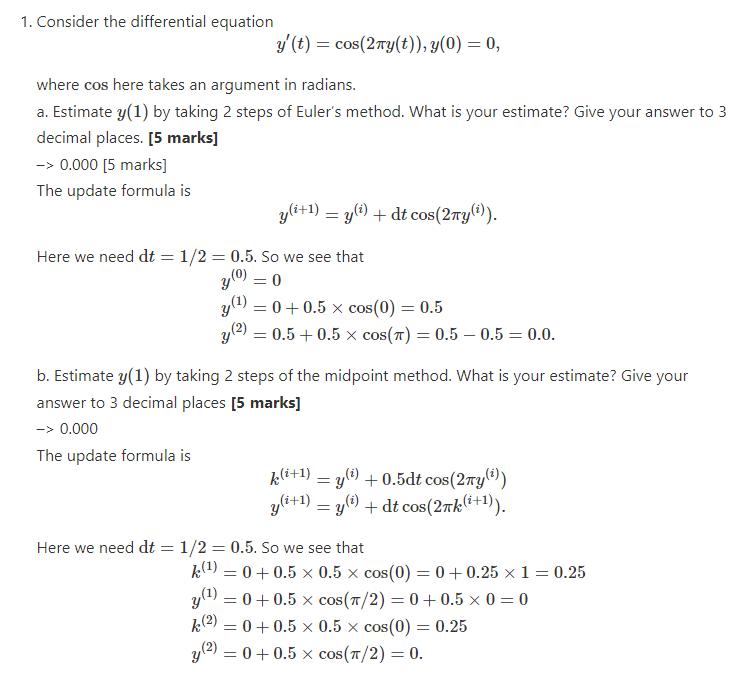

In [24]:
def Euler_method(t0, d0, dt, n, f):
    d = np.zeros(n+1)
    d[0] = d0

    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = t0 + i*dt
    
    for i in range(1, n+1):          
        d[i] = d[i-1] + dt * f(t[i-1], d[i-1])
                                       
    return t, d

# ***Midpoint Method***

The midpoint method is an improvement in eulers method which provides a lower error for the same number of calculations (although there are double the number of calculations per step)

In [11]:
def midpoint_method(t0, d0, dt, n, f):
    d = np.zeros(n+1)
    d[0] = d0

    t = np.zeros(n+1)
    for i in range(n+1):
        t[i] = t0 + i*dt
    
    for i in range(1, n+1):
        d_half = d[i-1] + 0.5 * dt * f(t[i-1], d[i-1])
        d[i] = d[i-1] + dt * f((t[i-1]+t[i])/2.0, d_half)
                                       
    return t, d

# ***Iterative methods***
Used to solve systems of equations in faster time, losing precision. Guass Seidel is literally the same as Jacobi but it uses a more recent version of the other xs when iterating

In [29]:
def Jacobi_iteration(A, b, max_iteration, x0 = None, verbose = False):
    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
     
    # check sizes of A and b match appropriately
    nb=len(b)
    n, m = A.shape
    if n != m:
        raise ValueError(f'A is not a square matrix! {A.shape=}')
    if n != nb:
        raise ValueError(f'shapes of A and b do not match! {A.shape=} {b.shape=}')

    # check diagonal is non zero
    for i in range(n):
        if np.isclose(A[i, i], 0):
            raise ValueError(f'A[{i}, {i}] is zero')

    # construct iteration matrices
    P=np.zeros([n,n])    # matrix P = D^{-1}(L+U)
    p=np.zeros(n)        # vector p = D^{-1} b
    for i in range(n):
        p[i]=b[i]/A[i,i] 
        for j in range(n):
             P[i,j] = A[i,j]/A[i,i]
        P[i,i] = 0
        
    #create a new array to store the results, initialised as zero
    if x0 is None:
        x = np.zeros_like(b)
    else:
        x = x0.copy()
    
    # perform iteration x <- p - P * x
    for i in range(max_iteration):
        xnew = np.empty_like(x)
        for i in range(n):
            xnew[i] = p[i]
            for j in range(n):
                xnew[i] -= P[i, j] * x[j]
        x = xnew.copy()
        if verbose:
            print("iteration ", i+1)
            print(x)
                
    return x

In [30]:
def Gauss_Seidel_iteration(A, b, max_iteration, x0 = None, verbose = False):
    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
     
    # check sizes of A and b match appropriately
    nb=len(b)
    n, m = A.shape
    if n != m:
        raise ValueError(f'A is not a square matrix! {A.shape=}')
    if n != nb:
        raise ValueError(f'shapes of A and b do not match! {A.shape=} {b.shape=}')

    for i in range(n):
        if np.isclose(A[i, i], 0):
            raise ValueError(f'A[{i}, {i}] is zero')

    # do not construct iteration matrices explicitly
    LD = np.zeros_like(A)
    U = np.zeros_like(A)
    for i in range(n):
        for j in range(n):
            if i < j:
                U[i, j] = A[i, j]
            else:
                LD[i, j] = A[i, j]
    
    # p = (L + D)^{-1} b --> found by solving triangular system
    # (L + D) p = b
    p = lower_triangular_solve(LD, b)
      
    #create a new array to store the results, initialised as zero
    if x0 is None:
        x = np.zeros_like(b)
    else:
        x = x0.copy()
        
    # perform iteration x <- p - P * x
    # (L+D)(xnew - p) = U*x
    Ux = np.empty_like(x)
    for i in range(max_iteration):
        for i in range(n):
            Ux[i] = 0.0
            for j in range(i+1, n):
                Ux[i] += U[i, j] * x[j]
        Px = lower_triangular_solve(LD, Ux)
        x = p - Px
        if verbose:
            print("iteration ", i+1)
            print(x)
                
    return x

***Jacobi method with error printing***

In [31]:
def jacobi_printing(A, u, b, n_iterations, u_exact):
    """
    Solve the system A u = b using a Jacobi iteration

    ARGUMENTS:  A   k x k matrix
                u   k-vector storing initial estimate
                b   k-vector storing right-hand side
                n_iterations
                    integer number of iterations to carry out
                u_exact
                    exact solution for comparison

    RESULTS:    u   k-vector storing solution
    """

    # Get dimension
    k = len(A)

    # Make sure we are working with floats
    A = A.astype(float)
    u = u.astype(float)
    b = b.astype(float)

    # Print headers
    print("n    abs. error")
    print("---  ----------")

    # print zero it error
    error = np.linalg.norm(u - u_exact)
    print(f"{0:3d}  {error}")

    for it in range(n_iterations):
        r = b - np.dot(A, u)
        for j in range(k):
            r[j] = r[j] / A[j, j]

        u = u + r
        error = np.linalg.norm(u - u_exact)

        print(f"{it+1:3d}  {error}")
    return u

# define problem
A = np.array([[3, 1], [2, 3]])
b = np.array([[14 / 3], [7 / 3]])

# intial guess
x0 = np.array([[0], [0]])

# exact solution
x_exact = np.array([[5 / 3], [-1 / 3]])

# print solution information
jacobi_printing(A, x0, b, 10, x_exact)

n    abs. error
---  ----------
  0  1.699673171197595
  1  1.11665284679121
  2  0.3777051491550212
  3  0.24814507706471342
  4  0.08393447759000477
  5  0.055143350458825215
  6  0.01865210613111215
  7  0.012254077879738909
  8  0.0041449124735804446
  9  0.0027231284177197898
 10  0.0009210916607954561


array([[ 1.66576346],
       [-0.33315269]])

# ***Root finding***
Newton's method and the bisection method are both iterative methods to find the roots of non-linear equations. Newton's method converges faster The bisection method will always find the root, but Newton's method may not

In [27]:
def newton(f, df, x0, tol, verbose = False):
    x = x0
    y = f(x)
    it = 0
    while abs(y) > tol:   # iterate until less than or eq tol
        x = x - y / df(x)  # apply one Newton iteration
        y = f(x)           # reevaluate f at new estimate
        it = it + 1
        if verbose:
            print("iteration ", it)
            print(x)

    return x, it

    
def bisection(f, x0, x1, tol, verbose = False):
    it = 0
    x = (x0 + x1)/2.0
    while abs(f(x)) > tol:
        it = it +1
        x = (x0 + x1)/2.0
        if abs(x) < 1.e-6: return x
        if f(x)*f(x0) < 0:
            x1 = x
        else:
            x0 = x  
        if verbose:
            print("iteration ", it)
            print(x)

    return x, it

In [28]:
def secant(f, x0, x1, tol):
    x = x1
    it = 0
    while abs(f(x)) > tol:   # iterate until less than or eq tol
        x = x - f(x1) *(x1-x0) / (f(x1) - f(x0))  # apply one Newton iteration
        x0 = x1
        x1 = x
        it = it + 1

    return x, it

# ***Extra Notes***

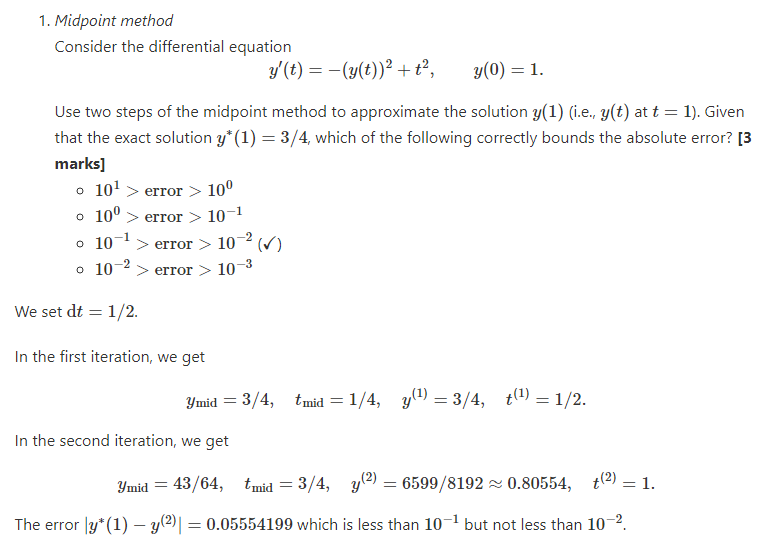

***Jacobi Iteration***

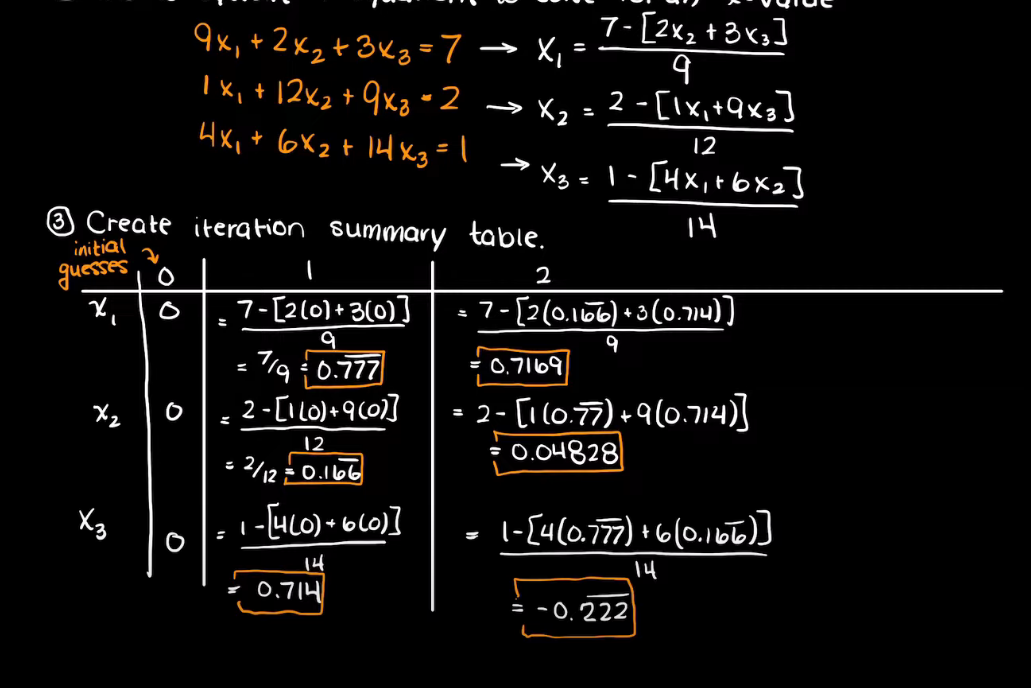

***Gauss-Seidel Method***

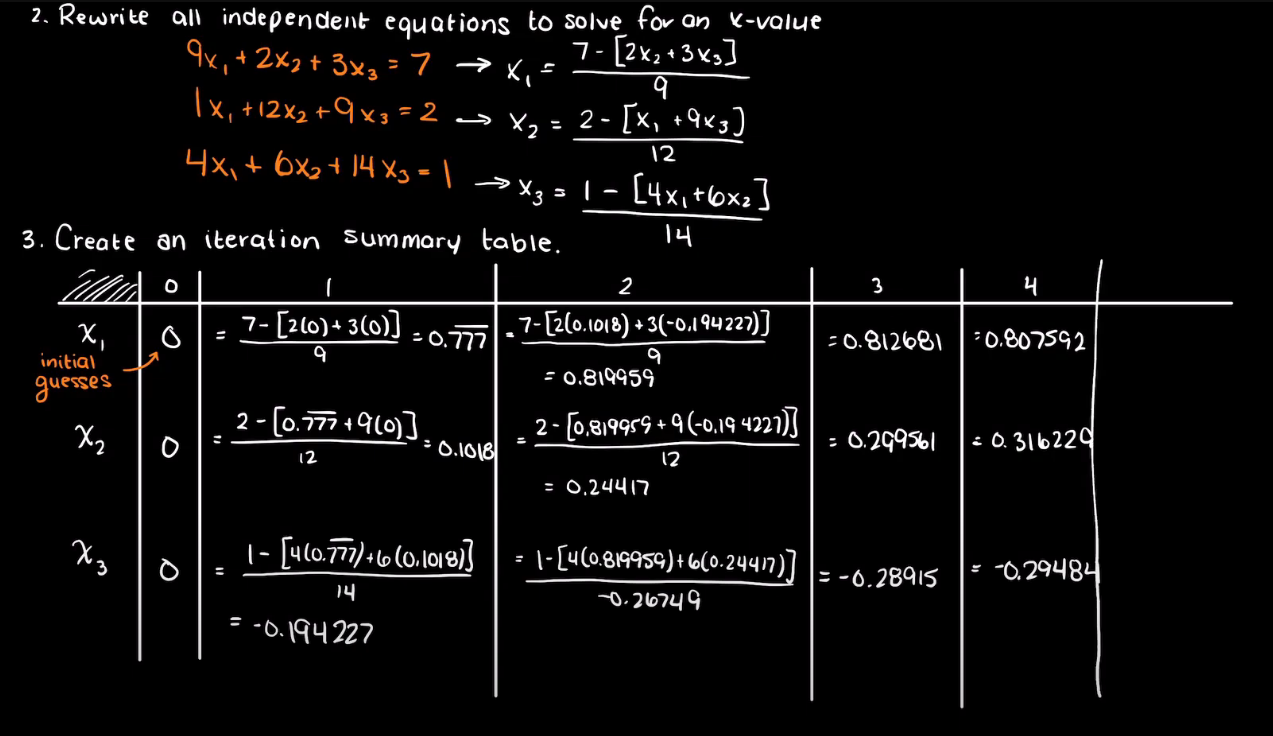